Assignment 1 – ML Models

**Introduction**
<br>The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the aggregate rating of each restaurant, establishment of different types of restaurant at different places, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.

**Abstract**
<br>The main objective of this project is to determine the ratings for all the restaurants in Banglore based on the dataset that is given. For the determining the ratings, Regression analysis is used. The models that will be used for the same are Linear Regressor, Random Forest Regressor and SVM Regressor.

**Dataset**
<br>The dataset for the analysis is taken from kaggle.com. The size of the dataset is 547.48 MB and has 17 columns. Following are the columns in the dataset:
- url
- address
- name
- online_order
- book_table
- rate
- votes
- phone
- location
- rest_type
- dish_liked
- cuisines
- approx_cost(for two people)
- reviews_list
- menu_item
- listed_in(type)
- listed_in(city)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import sys

In [2]:
data=pd.read_csv('zomato.csv')

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.shape

(51717, 17)

In [5]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
del data['url']
del data['phone']
del data['address']
del data['location']

In [7]:
data.head()

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**Data Pre-processing**

In [8]:
data.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
data['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)

In [10]:
data=data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                         'listed_in(city)':'city'})

In [11]:
data.online_order=data.online_order.apply(lambda x: '1' if str(x)=='Yes' else '0')
data.book_table=data.book_table.apply(lambda x: '1' if str(x)=='Yes' else '0')

In [12]:
data.rate.dtype

dtype('O')

In [13]:
data.rate=data.rate.astype(str)
data.rate=data.rate.apply(lambda x : x.replace('/5',''))
data.rate=data.rate.astype(float)

In [14]:
data.rate.dtype

dtype('float64')

In [15]:
data.cost.dtype

dtype('O')

In [16]:
data.cost=data.cost.astype(str)
data.cost=data.cost.apply(lambda y : y.replace(',',''))
data.cost=data.cost.astype(float)

In [17]:
data.cost.dtype

dtype('float64')

In [18]:
data.online_order=data.online_order.astype(float)
data.book_table=data.book_table.astype(float)
data.votes=data.votes.astype(float)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
name            51717 non-null object
online_order    51717 non-null float64
book_table      51717 non-null float64
rate            41665 non-null float64
votes           51717 non-null float64
rest_type       51490 non-null object
dish_liked      23639 non-null object
cuisines        51672 non-null object
cost            51371 non-null float64
reviews_list    51717 non-null object
menu_item       51717 non-null object
type            51717 non-null object
city            51717 non-null object
dtypes: float64(5), object(8)
memory usage: 5.1+ MB


In [20]:
data.dropna(how='any',inplace=True)

In [21]:
data.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [22]:
data.drop_duplicates(keep='first',inplace=True)

In [23]:
data.head()

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,1.0,1.0,4.1,775.0,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,1.0,0.0,4.1,787.0,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,1.0,0.0,3.8,918.0,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,0.0,0.0,3.7,88.0,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,0.0,0.0,3.8,166.0,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**Data Visualization**

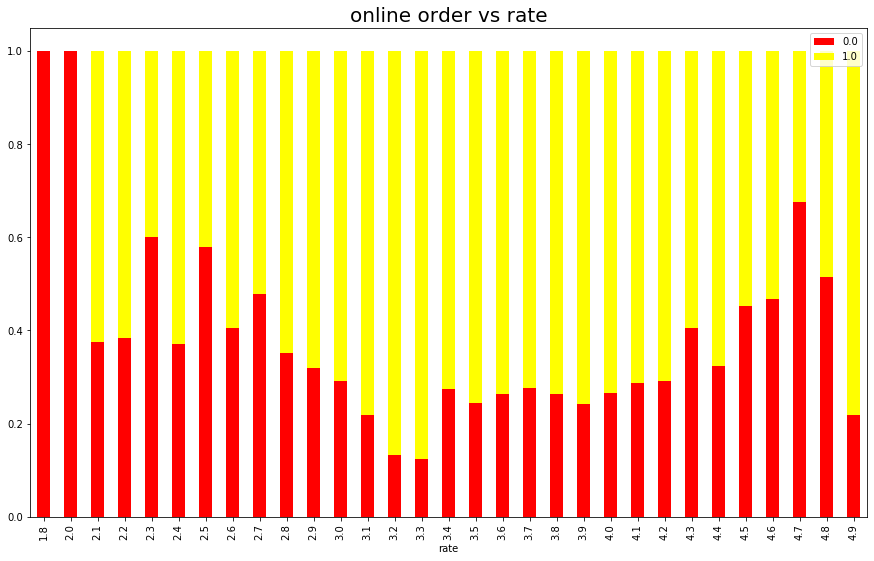

In [24]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(data['rate'], data['online_order'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('online order vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

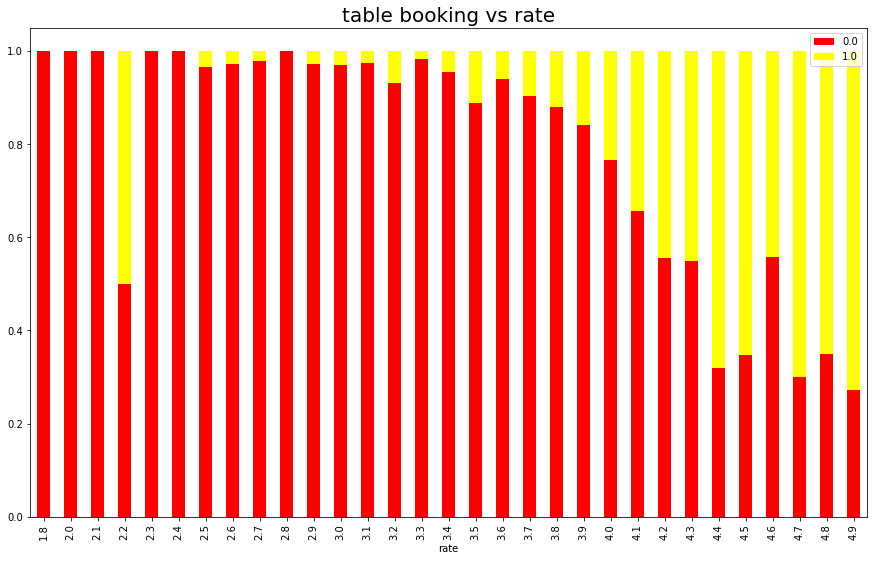

In [25]:
plt.rcParams['figure.figsize'] = (15, 9)
y = pd.crosstab(data['rate'], data['book_table'])
y.div(y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

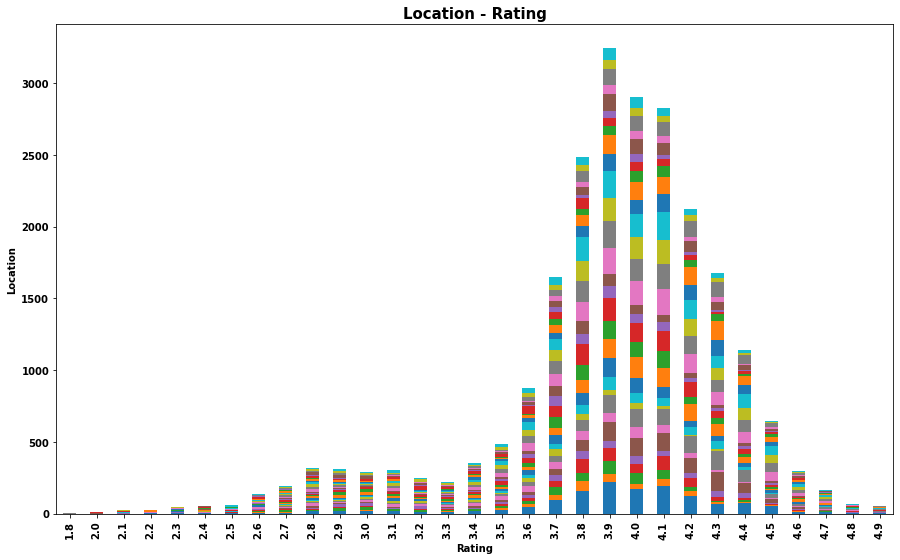

In [26]:
loc_plt=pd.crosstab(data['rate'],data['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

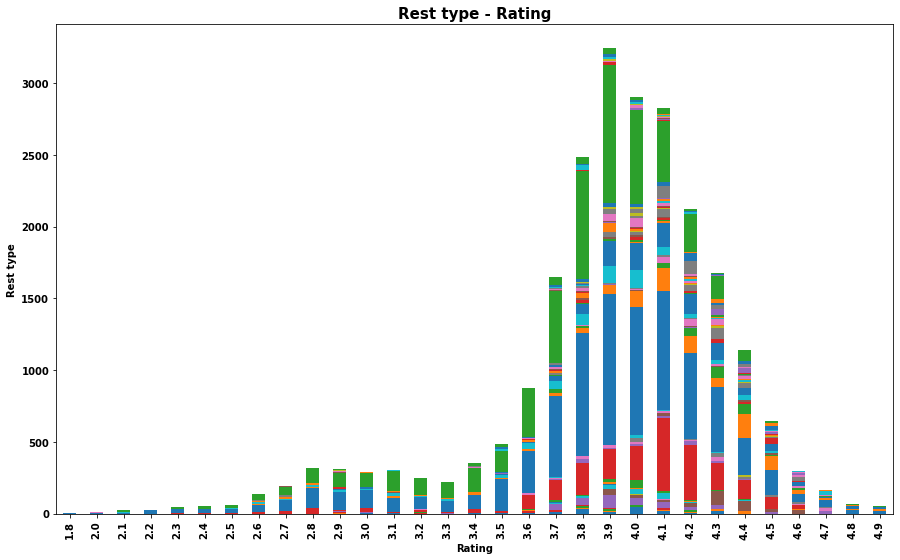

In [27]:
loc_plt=pd.crosstab(data['rate'],data['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

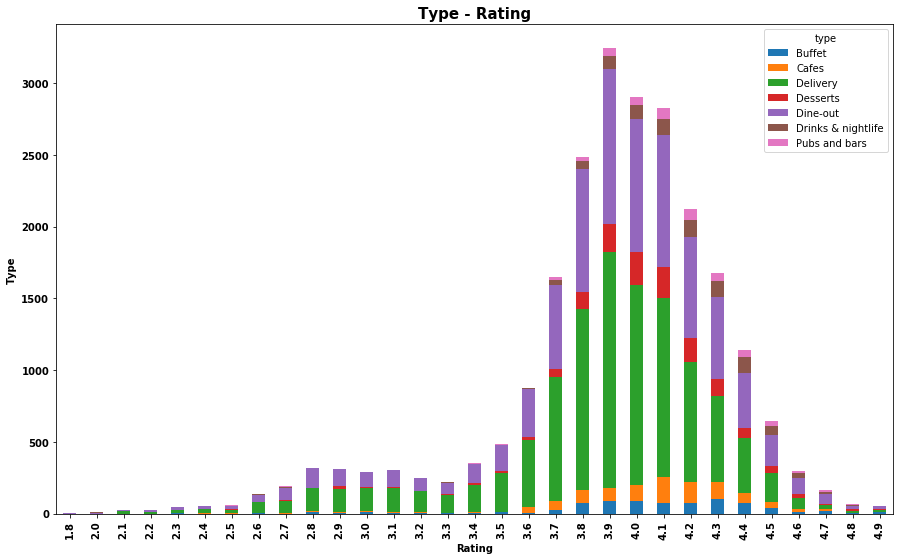

In [28]:
type_plt=pd.crosstab(data['rate'],data['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

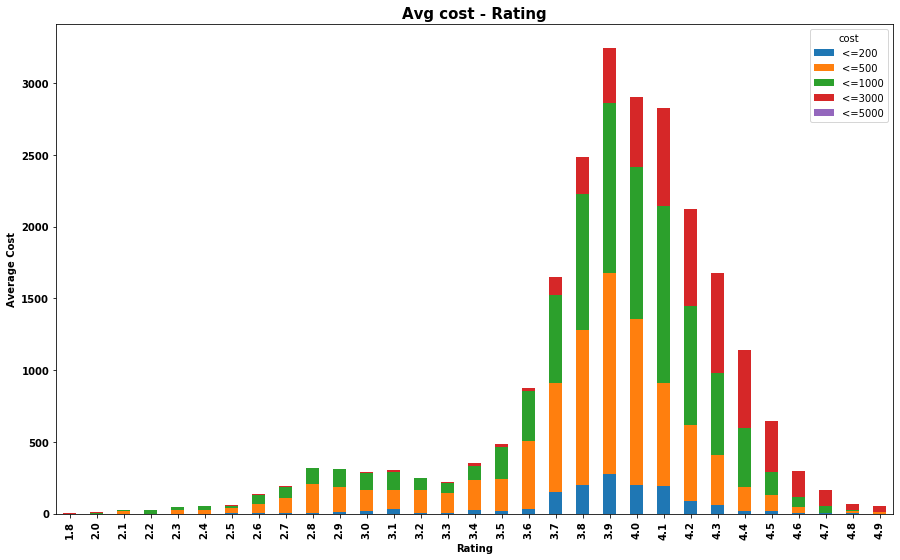

In [29]:
cost_for_two = pd.cut(data['cost'],bins = [0, 200, 500, 1000, 5000, 8000],labels = ['<=200', '<=500', '<=1000', '<=3000', '<=5000',])
cost_plt=pd.crosstab(data['rate'],cost_for_two)
cost_plt.plot(kind='bar',stacked=True);
plt.title('Avg cost - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Average Cost',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

One hot encoding

In [30]:
dummy_rest_type=pd.get_dummies(data['rest_type'])
dummy_type=pd.get_dummies(data['type'])
dummy_city=pd.get_dummies(data['city'])
dummy_cuisines=pd.get_dummies(data['cuisines'])
dummy_dishliked=pd.get_dummies(data['dish_liked'])

In [31]:
data=pd.concat([data,dummy_rest_type,dummy_type,dummy_city,dummy_cuisines,dummy_dishliked],axis=1)

In [32]:
del data['rest_type']
del data['type']
del data['city']
del data['cuisines']
del data['dish_liked']

In [33]:
data.head()

,name,online_order,book_table,rate,votes,cost,reviews_list,menu_item,Bakery,"Bakery, Cafe",...,"Wings, Lime Soda, Manchow Soup, Biryani, Fried Rice, Chop Suey, Tandoori Roti","Wings, Pizza","Wonton, American Chopsuey",Wood Fire Pizza,"Wood Fire Pizza, Cocktails, Ferrero Rocher Shake, Falafel, Peri Peri Chicken, Pasta, Mocktails","Wood Fire Pizza, Cocktails, Ferrero Rocher Shake, Falafel, Peri Peri Chicken, Pasta, Nachos","Zinger Burger, Burgers, Popcorn Chicken","Zinger Burger, Crispy Chicken, Rice Bowl, Hot Wings, Pizza, Chicken Popcorn, Virgin Mojito","Zinger Burger, French Fries, Choco Lash, Hot Wings, Virgin Mojito","Zinger Burger, Hot Wings, Chicken Wings, Crispy Chicken, Fries"
0,Jalsa,1.0,1.0,4.1,775.0,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],0,0,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1.0,0.0,4.1,787.0,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],0,0,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,1.0,0.0,3.8,918.0,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],0,0,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,0.0,0.0,3.7,88.0,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],0,0,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,0.0,0.0,3.8,166.0,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],0,0,...,0,0,0,0,0,0,0,0,0,0


We standardize the data because the target column(ratings)and other independent columns showcase Normal Distribution

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()

In [36]:
x=data.drop(['name',#'dish_liked',
          'reviews_list',
          'menu_item',#'cuisines'
         ],axis=1);

In [37]:
x_fit=scaler.fit_transform(x)

/Users/ira/anaconda3/envs/py3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ira/anaconda3/envs/py3.7/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [38]:
x=pd.DataFrame(x_fit,columns=x.columns)

In [39]:
X_init=x.drop(['rate'],axis=1)
split_x=X_init.iloc[:,:]
split_x.info()
split_x.shape
split_x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23248 entries, 0 to 23247
Columns: 6989 entries, online_order to Zinger Burger, Hot Wings, Chicken Wings, Crispy Chicken, Fries
dtypes: float64(6989)
memory usage: 1.2 GB


,online_order,book_table,votes,cost,Bakery,"Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Quick Bites",Bar,"Bar, Casual Dining",...,"Wings, Lime Soda, Manchow Soup, Biryani, Fried Rice, Chop Suey, Tandoori Roti","Wings, Pizza","Wonton, American Chopsuey",Wood Fire Pizza,"Wood Fire Pizza, Cocktails, Ferrero Rocher Shake, Falafel, Peri Peri Chicken, Pasta, Mocktails","Wood Fire Pizza, Cocktails, Ferrero Rocher Shake, Falafel, Peri Peri Chicken, Pasta, Nachos","Zinger Burger, Burgers, Popcorn Chicken","Zinger Burger, Crispy Chicken, Rice Bowl, Hot Wings, Pizza, Chicken Popcorn, Virgin Mojito","Zinger Burger, French Fries, Choco Lash, Hot Wings, Virgin Mojito","Zinger Burger, Hot Wings, Chicken Wings, Crispy Chicken, Fries"
0,0.647661,1.684697,0.152232,0.089342,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
1,0.647661,-0.593579,0.163007,0.089342,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
2,0.647661,-0.593579,0.280635,0.089342,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
3,-1.544017,-0.593579,-0.464640,-0.871345,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
4,-1.544017,-0.593579,-0.394602,-0.294933,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
5,0.647661,-0.593579,-0.286852,-0.294933,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
6,0.647661,1.684697,1.751431,-0.294933,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
7,0.647661,-0.593579,-0.252731,-0.102795,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
8,0.647661,-0.593579,-0.091105,-0.391001,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
9,0.647661,-0.593579,-0.182693,-0.487070,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559


In [40]:
Y_init=x.drop(x.columns.difference(['rate']),axis=1)
split_y=Y_init.iloc[:,:]
split_y=split_y.astype(float)
split_y.shape
split_y

,rate
0,0.455759
1,0.455759
2,-0.248229
3,-0.482891
4,-0.248229
5,-0.248229
6,1.629072
7,0.221096
8,0.690422
9,0.455759


In [41]:
from sklearn.feature_selection import SelectKBest

In [42]:
bestfeatures=SelectKBest(k='all')
fit=bestfeatures.fit(split_x,split_y)

/Users/ira/anaconda3/envs/py3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
fit

SelectKBest(k='all', score_func=<function f_classif at 0x1a34387268>)

In [44]:
scores=pd.DataFrame(fit.scores_)
columns_=pd.DataFrame(split_x.columns)

In [45]:
featurescore=pd.concat([columns_,scores],axis=1)

In [46]:
featurescore.columns = ['Features','Score']

In [47]:
print(featurescore.nlargest(20,'Score'))

                                               Features         Score
3668                                                 Dj  4.945501e+18
3650                                    Dance Floor, Dj  3.480902e+03
4932  Nachos, Pizza, Margarita, Mushroom Soup, Tacos...  7.730345e+02
4818     Mutton Biryani, Chilli Paneer, Chicken Biryani  4.638606e+02
2                                                 votes  4.164189e+02
248                         Asian, Chinese, Thai, Momos  4.074809e+02
4975  Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum...  2.895259e+02
5062                          Noodles, Tandoori Chicken  2.319103e+02
3391  Coffee, Berryblast, Nachos, Chocolate Waffles,...  2.154611e+02
1223                                            Mexican  2.100839e+02
5849            Raita, Vegetable Biryani, Biryani Combo  1.931005e+02
1                                            book_table  1.771056e+02
4909  Naan, Pot Biryani, Chicken Guntur, Paneer Tikk...  1.718964e+02
6040  Rolls, Rasgull

In [48]:
col_select=featurescore.nlargest(800,'Score')

In [49]:
col_select.drop('Score',axis=1,inplace=True)

In [50]:
col_select_list=list(col_select.Features)

Feature Selection

In [51]:
x_select=split_x.loc[:,col_select_list]

In [52]:
x_select.head()

,Dj,"Dance Floor, Dj","Nachos, Pizza, Margarita, Mushroom Soup, Tacos, Tortilla Soup, Chicken Burritos","Mutton Biryani, Chilli Paneer, Chicken Biryani",votes,"Asian, Chinese, Thai, Momos","Noodles, Chicken Dim Sum, Pad Thai Noodle, Jumbo Prawns, Cocktails, Prawn Sushi, Treasure Soup","Noodles, Tandoori Chicken","Coffee, Berryblast, Nachos, Chocolate Waffles, Nutella Waffle, Chocolate Overload, Sandwiches",Mexican,...,"North Indian, Mughlai, Biryani",Friendly Staff,"Continental, North Indian, Chinese, American",Delivery,Delivery,"Soya Chaap, Biryani","Pizza, Desserts","Pizza, Waffles","Cafe, Italian, Continental, European, Biryani, Chinese","North Indian, Chinese, Momos, Rolls"
0,-0.014667,-0.019679,-0.023654,-0.019679,0.152232,-0.0286,-0.025409,-0.016067,-0.022725,-0.036541,...,-0.044039,-0.054162,-0.016067,-0.176714,-0.919999,-0.01136,-0.01136,-0.01136,-0.01136,-0.01136
1,-0.014667,-0.019679,-0.023654,-0.019679,0.163007,-0.0286,-0.025409,-0.016067,-0.022725,-0.036541,...,-0.044039,-0.054162,-0.016067,-0.176714,-0.919999,-0.01136,-0.01136,-0.01136,-0.01136,-0.01136
2,-0.014667,-0.019679,-0.023654,-0.019679,0.280635,-0.0286,-0.025409,-0.016067,-0.022725,-0.036541,...,-0.044039,-0.054162,-0.016067,-0.176714,-0.919999,-0.01136,-0.01136,-0.01136,-0.01136,-0.01136
3,-0.014667,-0.019679,-0.023654,-0.019679,-0.464640,-0.0286,-0.025409,-0.016067,-0.022725,-0.036541,...,-0.044039,-0.054162,-0.016067,-0.176714,-0.919999,-0.01136,-0.01136,-0.01136,-0.01136,-0.01136
4,-0.014667,-0.019679,-0.023654,-0.019679,-0.394602,-0.0286,-0.025409,-0.016067,-0.022725,-0.036541,...,-0.044039,-0.054162,-0.016067,-0.176714,-0.919999,-0.01136,-0.01136,-0.01136,-0.01136,-0.01136


In [53]:
x_select = x_select.loc[:, ~x_select.columns.duplicated()]

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_select,split_y,test_size=0.05,random_state=42)

Liner Regressor

In [55]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [56]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
Y_linreg_pred=linreg.predict(X_test)

In [58]:
from sklearn.metrics import r2_score

In [59]:
r2_score(y_test,Y_linreg_pred)

0.7246682032854844

In [60]:
accuracy_lr=linreg.score(X_train,y_train)

In [61]:
accuracy_lr

0.7472154121519136

Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=100,random_state=42)

In [63]:
rf_reg.fit(X_train,y_train)

/Users/ira/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [64]:
Y_rgreg_pred=rf_reg.predict(X_test)

In [65]:
r2_score(y_test,Y_rgreg_pred)

0.9150216684061978

In [66]:
accuracy_rf=rf_reg.score(X_train,y_train)

In [67]:
accuracy_rf

0.9800607256876624

SVM Regressor

In [68]:
from sklearn.svm import LinearSVR
svr=LinearSVR(random_state=42)

In [69]:
svr.fit(X_train,y_train)

/Users/ira/anaconda3/envs/py3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ira/anaconda3/envs/py3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [70]:
Y_svr_pred=svr.predict(X_test)

In [71]:
r2_score(y_test,Y_svr_pred)

0.7001449825109344

In [72]:
acc_svr=svr.score(X_train,y_train)

In [73]:
acc_svr

0.7360672169693045

**Conclusion**
<br>For the given dataset, the prediction was done using three regression models which are: Linear Regressor, Random Forest Regressor and SVM Regressor. From all the models implemented, Random Forest Regressor gave an accuracy of 98% which was best amongst all the models.
Future work:
Feature engineering,
Hyperparameter Sweeps,
Create better Regression models 

**Licence**
<br>Copyright <2022> AI Skunks  

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.